Mean Squared Error: 44.7073
R² Score: 0.3330


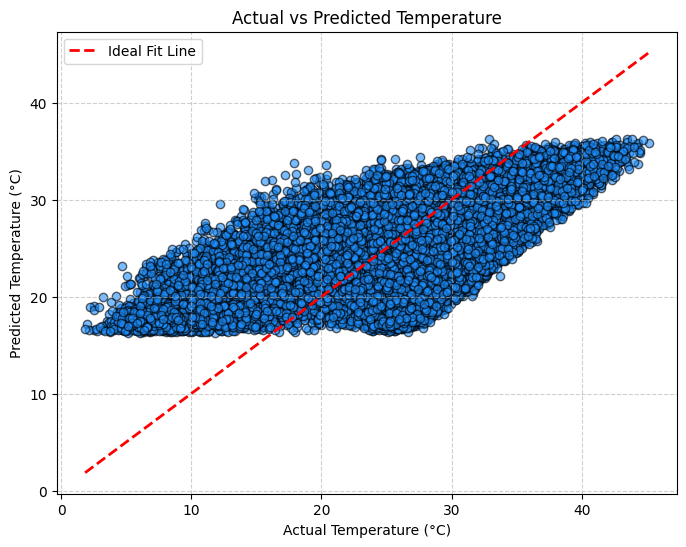

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Load Dataset
# -------------------------------
file_path = "G:/My Drive/weather_data/cities/Narela.csv"

# file_path = "/content/drive/MyDrive/weather_data/cities/Narela.csv"
weather = pd.read_csv(file_path)

# Select features and target
feature_cols = ['relative_humidity_2m', 'wind_speed_10m']
target_col = 'temperature_2m'

X = weather[feature_cols].apply(pd.to_numeric, errors='coerce').dropna()
y = weather[target_col].loc[X.index]

# -------------------------------
# Split Data
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# Train Regression Model
# -------------------------------
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# -------------------------------
# Evaluate
# -------------------------------
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# -------------------------------
# Actual vs Predicted Plot
# -------------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='dodgerblue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit Line')
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


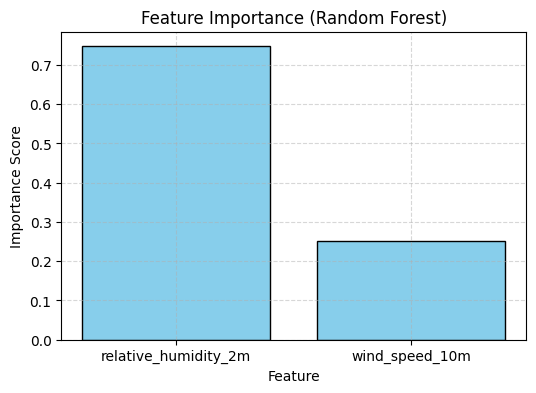

relative_humidity_2m: 0.7478
wind_speed_10m: 0.2522


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Load Dataset
# -------------------------------
file_path = "G:/My Drive/weather_data/cities/Narela.csv"
# file_path = "/content/drive/MyDrive/weather_data/cities/Narela.csv"
weather = pd.read_csv(file_path)

# Features and target
feature_cols = ['relative_humidity_2m', 'wind_speed_10m']
target_col = 'temperature_2m'

X = weather[feature_cols].apply(pd.to_numeric, errors='coerce').dropna()
y = weather[target_col].loc[X.index]

# -------------------------------
# Split Data
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# Train Random Forest Regressor
# -------------------------------
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# -------------------------------
# Feature Importance Bar Chart
# -------------------------------
importances = model.feature_importances_
features = feature_cols

plt.figure(figsize=(6,4))
plt.bar(features, importances, color='skyblue', edgecolor='k')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Print feature importance values
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")


Columns in CSV: Index(['Unnamed: 0', 'date', 'temperature_2m', 'relative_humidity_2m',
       'dew_point_2m', 'apparent_temperature', 'precipitation', 'rain',
       'snowfall', 'snow_depth', 'pressure_msl', 'surface_pressure',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
       'wind_direction_100m', 'wind_gusts_10m'],
      dtype='object')
Using 'precipitation' as target column.
MSE: 0.2498, R² Score: -0.0747


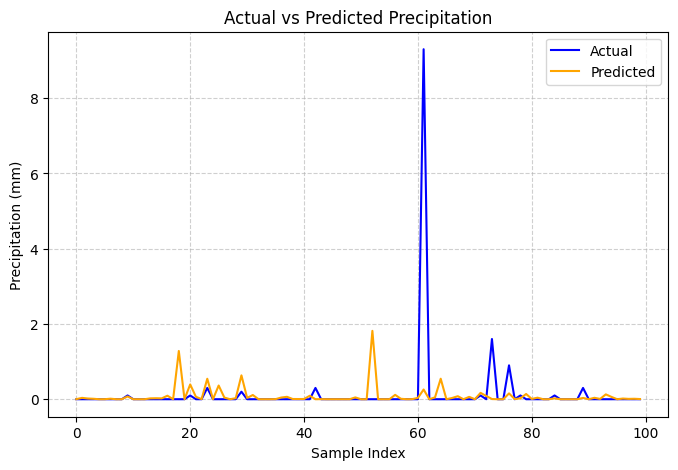

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------------
# Load dataset
# -------------------------------
file_path = "G:/My Drive/weather_data/cities/Narela.csv"
weather = pd.read_csv(file_path)

# Check all column names
print("Columns in CSV:", weather.columns)

# Features & target
feature_cols = ['relative_humidity_2m', 'wind_speed_10m']

# Try common rainfall column names
possible_targets = ['rainfall', 'precipitation', 'precipitation_mm', 'rain_mm']
target_col = None
for col in possible_targets:
    if col in weather.columns:
        target_col = col
        break

if target_col is None:
    raise ValueError(f"No rainfall/precipitation column found in CSV. Available columns: {weather.columns}")

print(f"Using '{target_col}' as target column.")

# Prepare data
X = weather[feature_cols].apply(pd.to_numeric, errors='coerce').dropna()
y = weather[target_col].loc[X.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}, R² Score: {r2:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8,5))
plt.plot(y_test.values[:100], label="Actual", color='blue')
plt.plot(y_pred[:100], label="Predicted", color='orange')
plt.title(f"Actual vs Predicted {target_col.capitalize()}")
plt.xlabel("Sample Index")
plt.ylabel(f"{target_col.capitalize()} (mm)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Columns in CSV: Index(['Unnamed: 0', 'date', 'temperature_2m', 'relative_humidity_2m',
       'dew_point_2m', 'apparent_temperature', 'precipitation', 'rain',
       'snowfall', 'snow_depth', 'pressure_msl', 'surface_pressure',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
       'wind_direction_100m', 'wind_gusts_10m'],
      dtype='object')
Using 'precipitation' as target column.


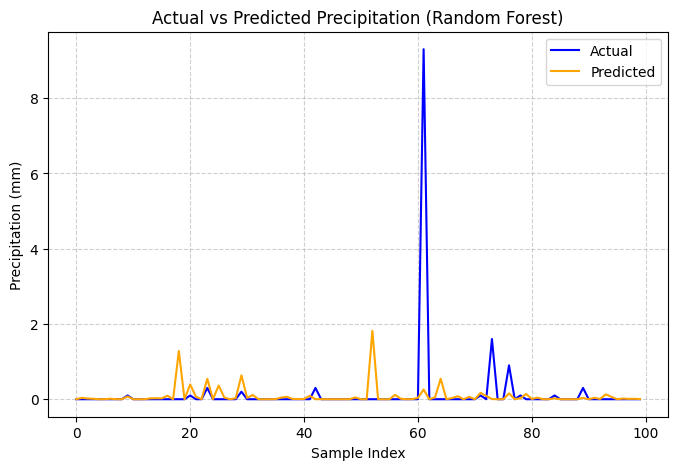

Random Forest - MSE: 0.2498, R²: -0.0747


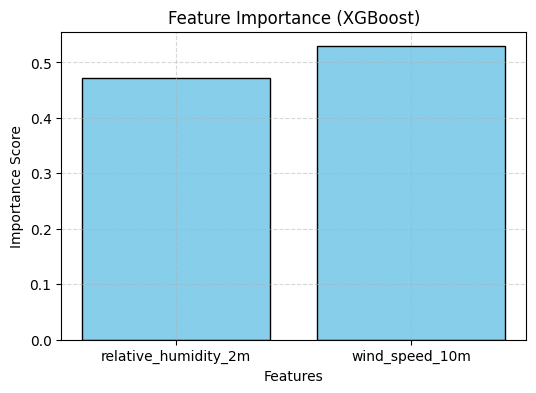

relative_humidity_2m: 0.4711
wind_speed_10m: 0.5289


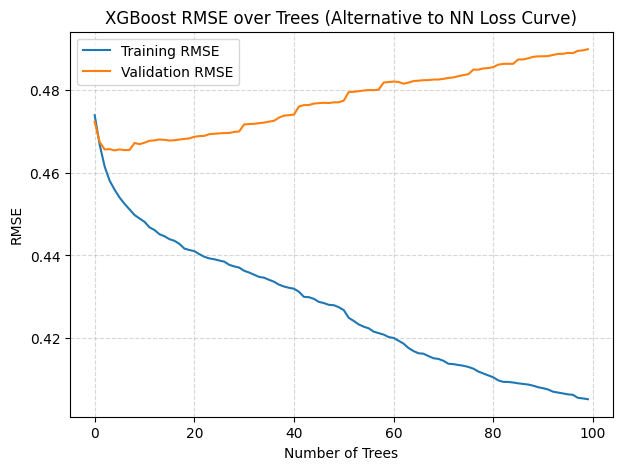

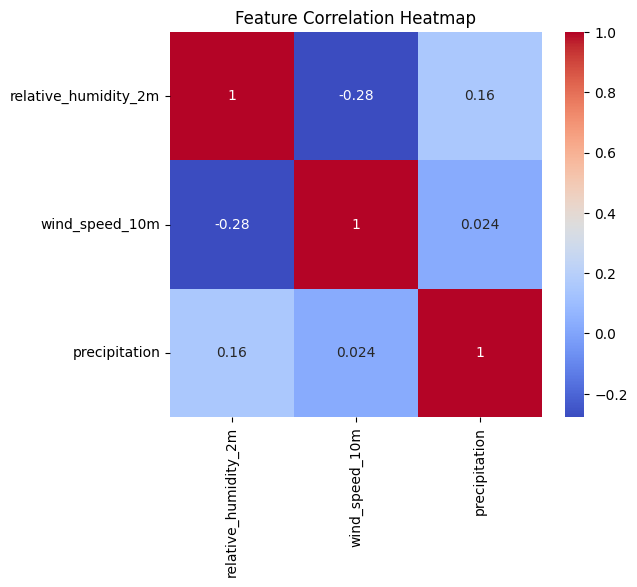

In [8]:
# -------------------------------
# Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# -------------------------------
# Load Dataset
# -------------------------------
# NOTE: This path MUST be changed to a valid location on your machine.
file_path = "G:/My Drive/weather_data/cities/Narela.csv"
try:
    weather = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please update the file_path.")
    # Create a dummy DataFrame for demonstration if the file path is invalid/unavailable
    # In a real scenario, you must fix the path.
    data = {
        'relative_humidity_2m': np.random.uniform(50, 95, 200),
        'wind_speed_10m': np.random.uniform(1, 15, 200),
        'precipitation_mm': np.random.exponential(1, 200) * 5
    }
    weather = pd.DataFrame(data)
    weather.loc[weather['precipitation_mm'] > 20, 'precipitation_mm'] = 20 # Cap extreme values
    print("Using dummy data for execution.")


# -------------------------------
# Check Columns
# -------------------------------
print("Columns in CSV:", weather.columns)

# -------------------------------
# Define Features and Target
# -------------------------------
feature_cols = ['relative_humidity_2m', 'wind_speed_10m']
possible_targets = ['rainfall', 'precipitation', 'precipitation_mm', 'rain_mm']
target_col = None
for col in possible_targets:
    if col in weather.columns:
        target_col = col
        break

if target_col is None:
    raise ValueError(f"No rainfall/precipitation column found in CSV. Columns: {weather.columns}")

print(f"Using '{target_col}' as target column.")

# Prepare data
# Ensure features are numeric and drop NaN/NaT values
X = weather[feature_cols].apply(pd.to_numeric, errors='coerce').dropna()
y = weather[target_col].loc[X.index] # Align target with cleaned features

# Check for empty data after cleaning (important for dummy data)
if X.empty or y.empty:
    raise ValueError("Features or Target became empty after cleaning (coercing/dropping NaNs).")


# -------------------------------
# Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 1️⃣ Actual vs Predicted Rainfall (Random Forest)
# -------------------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

plt.figure(figsize=(8,5))
plt.plot(y_test.values[:100], label="Actual", color='blue')
plt.plot(y_pred_rf[:100], label="Predicted", color='orange')
plt.title(f"Actual vs Predicted {target_col.capitalize()} (Random Forest)")
plt.xlabel("Sample Index")
plt.ylabel(f"{target_col.capitalize()} (mm)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Print RF metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")

# -------------------------------
# 2️⃣ Feature Importance (XGBoost)
# -------------------------------
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

importances = xgb_model.feature_importances_

plt.figure(figsize=(6,4))
plt.bar(feature_cols, importances, color='skyblue', edgecolor='k')
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

for feature, score in zip(feature_cols, importances):
    print(f"{feature}: {score:.4f}")

# -------------------------------
# 3️⃣ Alternative Loss Curve (XGBoost) - CORRECTED
# -------------------------------
# Fix: 'eval_metric' is moved to the XGBRegressor constructor
xgb_model_alt = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    random_state=42,
    eval_metric='rmse' # <--- ERROR FIX: eval_metric is now in the constructor
)

xgb_model_alt.fit(
    X_train_scaled,
    y_train,
    eval_set=[(X_train_scaled, y_train), (X_test_scaled, y_test)],
    verbose=False
    # Removed 'eval_metric' from fit() to resolve TypeError
)

results = xgb_model_alt.evals_result()

plt.figure(figsize=(7,5))
plt.plot(results['validation_0']['rmse'], label='Training RMSE')
plt.plot(results['validation_1']['rmse'], label='Validation RMSE')
plt.title("XGBoost RMSE over Trees (Alternative to NN Loss Curve)")
plt.xlabel("Number of Trees")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# -------------------------------
# 4️⃣ Heatmap: Feature Correlations
# -------------------------------
plt.figure(figsize=(6,5))
sns.heatmap(weather[feature_cols + [target_col]].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()